# Session 2 Notebook

# Data Cleaning Phase

### Inconsistent Data:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'Height': ['158', '162', 'one hundred thirty-four', '160', '154'],
    'Weight': ['50', '70', '60', 'eighty-five', '77'],
    'Gender': ['M', 'fEmale', 'male', 'FEMALE', 'female'],
    'Age': ['25', 'thirty', '22', '24', 'twenty-five']
}

In [4]:
df = pd.DataFrame(data)
df

,Height,Weight,Gender,Age
0,158,50,M,25
1,162,70,fEmale,thirty
2,one hundred thirty-four,60,male,22
3,160,eighty-five,FEMALE,24
4,154,77,female,twenty-five


In [21]:
df.dtypes  # Checking the data type of each column

Height    object
Weight    object
Gender    object
Age       object
dtype: object

- **Observation:**
    - Data Types of **`Height`**, **`Weights`** and **`Age`** must be of a **numeric** data type not object.

### 1) Wrong Data Types (Data Formats)

- Convertting Word to Numbers ("thirty" → 30) using:
    - A simple Dictionary **`Word2number`**.

In [2]:
import sys
!{sys.executable} -m pip install word2number


  Using cached word2number-1.1.zip (9.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5646 sha256=698ad945fda92e0fa47494644ea48ab9c85fe0fd0c55f983ba671acd580d7b39
  Stored in directory: c:\users\laphouse\appdata\local\pip\cache\wheels\aa\2b\71\ede4a3c3520a8374778c16c345e0e78e25d1ffe38f4c5c1e8a
Successfully built word2number



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: c:\Users\laphouse\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [4]:
from word2number import w2n  # You need first to install the module 

In [22]:
df['Height'] = df['Height'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

In [23]:
df

,Height,Weight,Gender,Age
0,158,50,M,25
1,162,70,fEmale,thirty
2,134,60,male,22
3,160,eighty-five,FEMALE,24
4,154,77,female,twenty-five


In [24]:
df['Weight'] = df['Weight'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
df['Age'] = df['Age'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

In [25]:
df

,Height,Weight,Gender,Age
0,158,50,M,25
1,162,70,fEmale,30
2,134,60,male,22
3,160,85,FEMALE,24
4,154,77,female,25


In [26]:
df.dtypes

Height     int64
Weight     int64
Gender    object
Age        int64
dtype: object

- Fixing Data Types:
    - Using  **`.to_numeric()`** function:
        - Convert a column (or a series) into numeric values (integers or floats).
        - If the values in the column are valid numeric strings **(ex:'5.8')**, they will be converted to floats. If there are invalid strings **(Ex:'five seven')**, Pandas will handle them according to the errors parameter.

In [ ]:
# df['col_name'] = pd.to_numeric(df['col_name'], errors='coerce')

### 2) Typos in Categorical Columns

In [28]:
df['Gender']

0         M
1    fEmale
2      male
3    FEMALE
4    female
Name: Gender, dtype: object

In [29]:
df['Gender'].value_counts()

Gender
M         1
fEmale    1
male      1
FEMALE    1
female    1
Name: count, dtype: int64

- **Observation:**
    - Same Category but seemed to be more than one category.

In [30]:
# Standardizing 'Gender' (Lowercasing)
df['Gender'] = df['Gender'].str.lower()

In [31]:
df['Gender'].value_counts()

Gender
female    3
m         1
male      1
Name: count, dtype: int64

In [32]:
# Replacing each 'm' value in 'Gender' column with 'male'
df['Gender'] = df['Gender'].replace('m', 'male')

In [33]:
df['Gender'].value_counts()

Gender
female    3
male      2
Name: count, dtype: int64

### Irrelevant and Redundant Features

In [36]:
df = pd.DataFrame({
    'Name': ['Alaa', 'Youness', 'Mohamed', 'Nour'],
    'Age': [25, 30, 35, 40],  
    'Favorite_Color': ['Blue', 'Green', 'Red', 'Yellow'],
    'height_inches': [65, 70, 75, 60],
    'height_cm': [165, 178, 190, 152],
    'weight': [60, 55, 70, 40]
})
df

,Name,Age,Favorite_Color,height_inches,height_cm,weight
0,Alaa,25,Blue,65,165,60
1,Youness,30,Green,70,178,55
2,Mohamed,35,Red,75,190,70
3,Nour,40,Yellow,60,152,40


- **Using Correlation:**

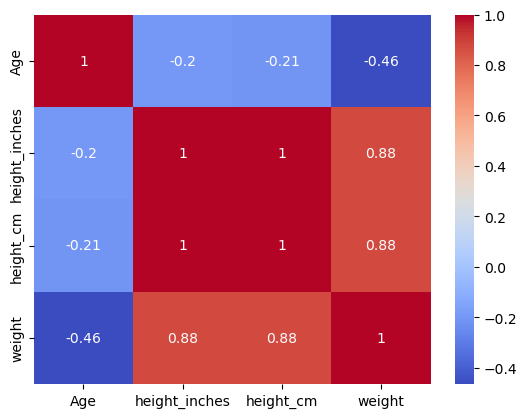

In [41]:
correlation_matrix = df.drop(columns=['Name', 'Favorite_Color']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

- **Observation:**
    - **`height_inches`** and **`height_cm`** are **highly strong correlated.**

In [43]:
df_cleaned = df.drop(columns=['height_inches', 'Favorite_Color'])
df_cleaned

,Name,Age,height_cm,weight
0,Alaa,25,165,60
1,Youness,30,178,55
2,Mohamed,35,190,70
3,Nour,40,152,40


- ***Pearson Correlation Coefficient:***
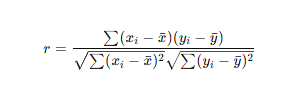

- **Using variance Threshold**:

In [48]:
df2 = pd.DataFrame({
    'Name': ['Alaa', 'Youness', 'Mohamed', 'Nour'],
    'Age': [25, 30, 35, 40],  
    'height_inches': [65, 70, 75, 60],
    'weight': [60, 55, 70, 40],
    'Feature_5': [120, 120 ,120 ,119.8],
    'Feature_6': [55, 55 ,55 ,55]
})
df2

,Name,Age,height_inches,weight,Feature_5,Feature_6
0,Alaa,25,65,60,120.0,55
1,Youness,30,70,55,120.0,55
2,Mohamed,35,75,70,120.0,55
3,Nour,40,60,40,119.8,55


- **'Feature_5'** and **'Feature_6'** have very **low variances**, while most of their values are almost the same across the dataset.

In [50]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Remove features with variance below 1%

data2 = df2.drop(columns=['Name'])
X_selected = selector.fit_transform(data2) 

X_selected

array([[25., 65., 60.],
       [30., 70., 55.],
       [35., 75., 70.],
       [40., 60., 40.]])

In [51]:
selected_features = data2.columns[selector.get_support()]

selected_df = pd.DataFrame(X_selected, columns=selected_features)

final_df = pd.concat([df2['Name'].reset_index(drop=True), selected_df.reset_index(drop=True)], axis=1)

final_df

,Name,Age,height_inches,weight
0,Alaa,25.0,65.0,60.0
1,Youness,30.0,70.0,55.0
2,Mohamed,35.0,75.0,70.0
3,Nour,40.0,60.0,40.0


# Outliers

In [53]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)  # Genereting data from Normal distribution

In [55]:
#outliers
outliers = np.array([120, 130, 140])
data_with_outliers = np.concatenate((data, outliers))

In [58]:
df = pd.DataFrame(data_with_outliers, columns=['Score'])
df.head()

,Score
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


**68% of values lie within 1 std dev** → between **40 and 60.**

**95% of values lie within 2 std devs** → between **30 and 70.**

### Detecting Outliers using IQR Method

In [59]:
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)]
outliers_iqr

,Score
74,23.802549
113,74.632421
179,77.201692
200,120.000000
201,130.000000
202,140.000000


### Detecting Outliers using Z-Score Method

In [61]:
from scipy import stats

In [65]:
z_scores = stats.zscore(df['Score'])
outliers_z = df[(np.abs(z_scores) > 3)]  # Threshold at 3 
outliers_z

,Score
200,120.0
201,130.0
202,140.0


### Detecting Oultiers using Boxplot

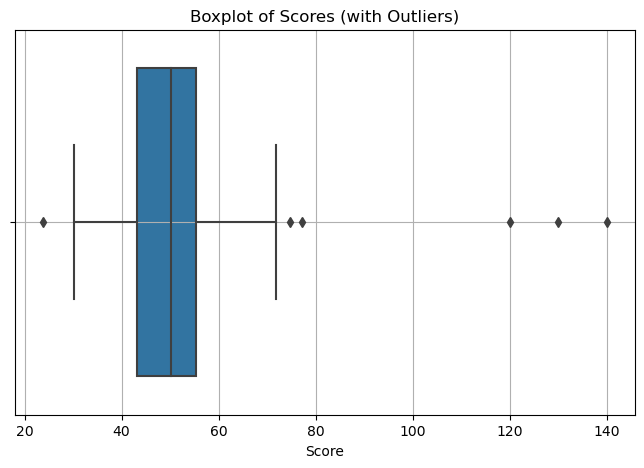

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Score'])
plt.title('Boxplot of Scores (with Outliers)')
plt.xlabel('Score')
plt.grid(True)
plt.show()

### Detecting Outliers using Histogram

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


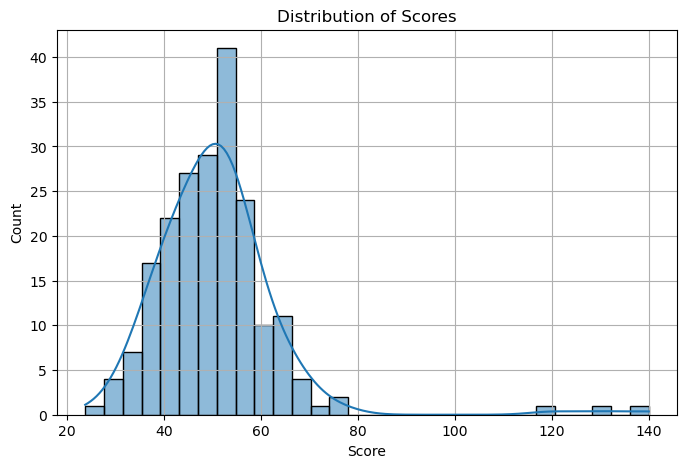

In [67]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], kde=True, bins=30)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.grid(True)
plt.show()

### Removing Outiers

In [69]:
df_cleaned = df[(df['Score'] >= lower_bound) & (df['Score'] <= upper_bound)]

print("Shape before removing outliers:", df.shape)

print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing outliers: (203, 1)
Shape after removing outliers: (197, 1)


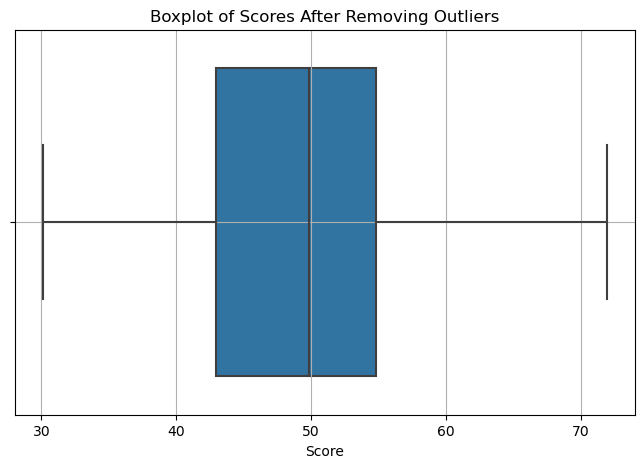

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Score'])
plt.title('Boxplot of Scores After Removing Outliers')
plt.xlabel('Score')
plt.grid(True)
plt.show()

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


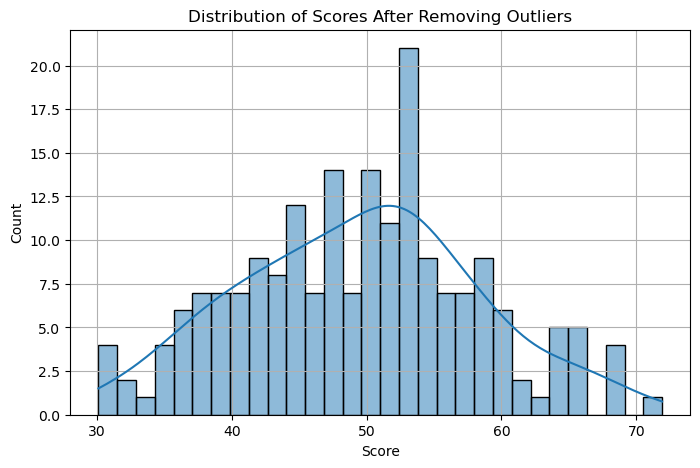

In [71]:
#after removing outliers
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Score'], kde=True, bins=30)
plt.title('Distribution of Scores After Removing Outliers')
plt.xlabel('Score')
plt.grid(True)
plt.show()

# Feature Engineering

### Binning Continuous data

In [78]:
np.random.seed(42)
data = {
    'age': np.random.randint(18, 80, size=100),
    'salary': np.random.randint(30000, 120000, size=100),
    'expenses': np.random.randint(5000, 50000, size=100),
}
df = pd.DataFrame(data)
df.head()

,age,salary,expenses
0,56,67065,11776
1,69,62606,32251
2,46,41534,14474
3,32,70397,45294
4,60,31016,26959


- Binning **`Age`** into Groups:

In [79]:
age_bins = [18, 30, 40, 50, 60, 80]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-80']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

- Groups:
     **`18-30`** → **Young**

     **`31-50`** → **Adult**

     **`51-60`** → **Mature Adult**

     **`61-80`** → **Senior**

In [80]:
# Mapping age groups to categories
age_category_map = {
    '18-30': 'Young',
    '31-40': 'Adult',
    '41-50': 'Adult',
    '51-60': 'Mature Adult',
    '61-80': 'Senior'
}
df['age_category'] = df['age_group'].map(age_category_map)
df.head()

,age,salary,expenses,age_group,age_category
0,56,67065,11776,51-60,Mature Adult
1,69,62606,32251,61-80,Senior
2,46,41534,14474,41-50,Adult
3,32,70397,45294,31-40,Adult
4,60,31016,26959,61-80,Senior


In [81]:
expenses_bins = [0, 10000, 25000, 50000]
expenses_labels = ['Low', 'Medium', 'High']

df['expenses_category'] = pd.cut(df['expenses'], bins=expenses_bins, labels=expenses_labels, right=False)
df.head()

,age,salary,expenses,age_group,age_category,expenses_category
0,56,67065,11776,51-60,Mature Adult,Medium
1,69,62606,32251,61-80,Senior,High
2,46,41534,14474,41-50,Adult,Medium
3,32,70397,45294,31-40,Adult,High
4,60,31016,26959,61-80,Senior,High


### Creating a New Feature:

In [82]:
#  'expense-to-salary' ratio (New Feature)
df['expense_to_salary'] = df['expenses'] / df['salary']
df.head()

,age,salary,expenses,age_group,age_category,expenses_category,expense_to_salary
0,56,67065,11776,51-60,Mature Adult,Medium,0.175591
1,69,62606,32251,61-80,Senior,High,0.515142
2,46,41534,14474,41-50,Adult,Medium,0.348486
3,32,70397,45294,31-40,Adult,High,0.643408
4,60,31016,26959,61-80,Senior,High,0.869197


# Feature Enconding

### 1) Ordinal Encoding
- Both **`age_category`** and **`expenses_category`** have a natural order.

- **`Age Categories`:** Young < Adult < Mature Adult < Senior

- **`Expenses Categories`:** Low < Medium < High

In [84]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
ordinal_features = ['age_category', 'expenses_category']

# Defining the order manually
age_category_order = ['Young', 'Adult', 'Mature Adult', 'Senior']
expenses_category_order = ['Low', 'Medium', 'High']

# Creating the OrdinalEncoder of 2 features
encoder = OrdinalEncoder(categories=[age_category_order, expenses_category_order])
encoder

OrdinalEncoder(categories=[['Young', 'Adult', 'Mature Adult', 'Senior'],
                           ['Low', 'Medium', 'High']])

In [86]:
# Fitting the data
df[['age_category_encoded', 'expenses_category_encoded']] = encoder.fit_transform(df[ordinal_features])

In [89]:
df.head()

,age,salary,expenses,age_group,age_category,expenses_category,expense_to_salary,age_category_encoded,expenses_category_encoded
0,56,67065,11776,51-60,Mature Adult,Medium,0.175591,2.0,1.0
1,69,62606,32251,61-80,Senior,High,0.515142,3.0,2.0
2,46,41534,14474,41-50,Adult,Medium,0.348486,1.0,1.0
3,32,70397,45294,31-40,Adult,High,0.643408,1.0,2.0
4,60,31016,26959,61-80,Senior,High,0.869197,3.0,2.0


### 2) One-hot Encoding

In [91]:
data3 = {
    'Employee_ID': [201, 202, 203, 204, 205],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Salary': [45000, 52000, 48000, 50000, 51000]
}

df3 = pd.DataFrame(data3)
df3.tail()

,Employee_ID,Gender,Salary
0,201,Male,45000
1,202,Female,52000
2,203,Female,48000
3,204,Male,50000
4,205,Female,51000


- Applying Oone-hot Encoding only to **`Gender`** column:

In [93]:
df_encoded = pd.get_dummies(df3, columns=['Gender'], drop_first=False)

In [95]:
df_encoded

,Employee_ID,Salary,Gender_Female,Gender_Male
0,201,45000,False,True
1,202,52000,True,False
2,203,48000,True,False
3,204,50000,False,True
4,205,51000,True,False


In [96]:
df_encoded = df_encoded.astype(int)
df_encoded

,Employee_ID,Salary,Gender_Female,Gender_Male
0,201,45000,0,1
1,202,52000,1,0
2,203,48000,1,0
3,204,50000,0,1
4,205,51000,1,0


- **'one column' only is remaining.**

In [97]:
df_encoded2 = pd.get_dummies(df3, columns=['Gender'], drop_first=True)
df_encoded2

,Employee_ID,Salary,Gender_Male
0,201,45000,True
1,202,52000,False
2,203,48000,False
3,204,50000,True
4,205,51000,False


In [98]:
df_encoded2 = df_encoded2.astype(int)
df_encoded2

,Employee_ID,Salary,Gender_Male
0,201,45000,1
1,202,52000,0
2,203,48000,0
3,204,50000,1
4,205,51000,0


# Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [100]:
np.random.seed(42)

normal_data = np.random.normal(loc=50, scale=10, size=100)

In [101]:
# Adding some outliers
outliers = np.array([150, 160, 170])

data_with_outliers = np.concatenate([normal_data, outliers])

In [102]:
df = pd.DataFrame({'Feature': data_with_outliers})
df.head()

,Feature
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


### Min-Max Scaling

In [104]:
min_max_scaler = MinMaxScaler()

df['MinMax_Scaled'] = min_max_scaler.fit_transform(df[['Feature']])

### Z-Score Normalization

In [115]:
zscore_scaler = StandardScaler()

df['Zscore_Scaled'] = zscore_scaler.fit_transform(df[['Feature']])

### Plotting the Results

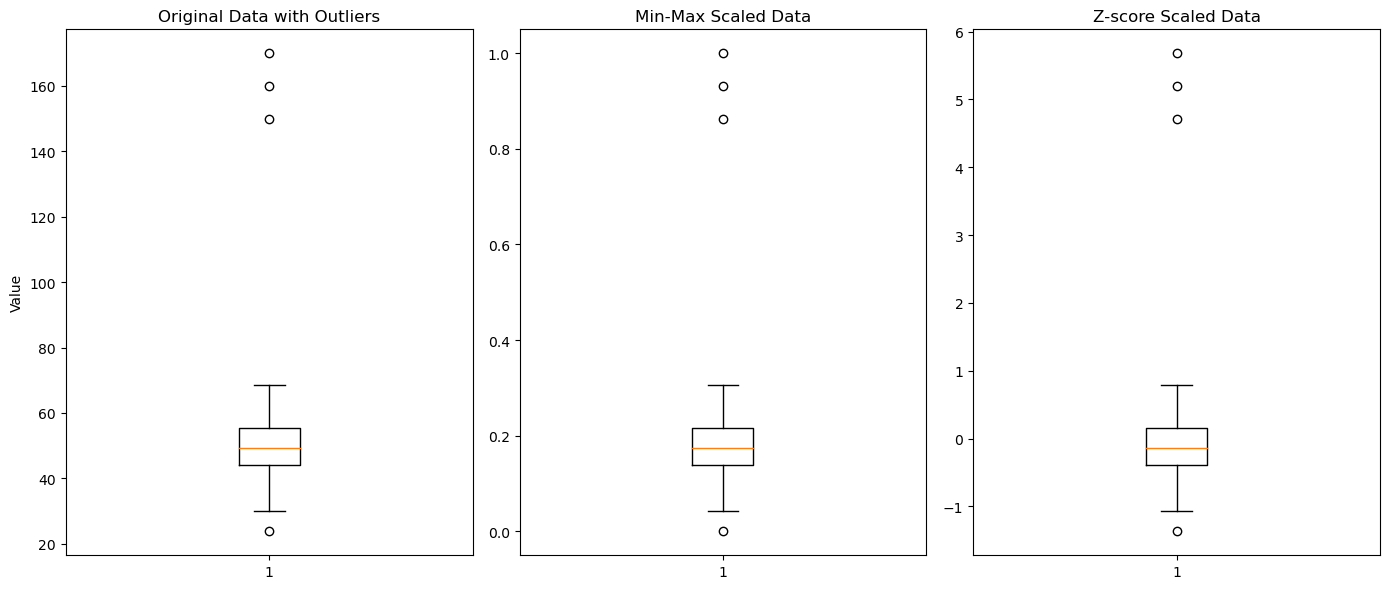

In [117]:
plt.figure(figsize=(14, 6))

# Original data with outliers
plt.subplot(1, 3, 1)
plt.boxplot(df['Feature'])
plt.title('Original Data with Outliers')
plt.ylabel('Value')

# Min-Max Scaled data
plt.subplot(1, 3, 2)
plt.boxplot(df['MinMax_Scaled'])
plt.title('Min-Max Scaled Data')

# Z-score Scaled data
plt.subplot(1, 3, 3)
plt.boxplot(df['Zscore_Scaled'])
plt.title('Z-score Scaled Data')

plt.tight_layout()
plt.show()